# Pothole Detection

### Dataset Path

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Pothole/6.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Pothole/5.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Pothole/8.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Pothole/1.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Pothole/7.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Pothole/4.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Pothole/3.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Pothole/2.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Plain/6.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Plain/5.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Plain/8.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Plain/1.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/test/Plain/7.jpg
/kaggle/input/pothole-and-plain-rode-images/My D

## Importing libraries

In [2]:
#!pip install tensorflowjs

In [3]:
#LIBRARY 1 : for data visualisation & manipulation
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
 
#LIBRARY 2 : for configure, with sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#LIBRARY 3 : for model selection
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

#LIBRARY 4 : for preprocess activity
from keras.preprocessing.image import ImageDataGenerator

#LIBRARY 5 : deep learning libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Model
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#LIBRARY 6 : for cnn specifically 
import random as rn
import tensorflow as tf
from keras.layers import InputLayer
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

#LIBRARY 7 : manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2    
import os, glob
import numpy as np  
from tqdm import tqdm  
from PIL import Image
from random import shuffle  
from zipfile import ZipFile
import keras.preprocessing.image as img
from keras.applications.resnet50 import ResNet50

Using TensorFlow backend.


## Setup Dataset 

In [4]:
dataset_path = '../input/pothole-and-plain-rode-images/My Dataset/train'

In [5]:
img_list = glob.glob(os.path.join(dataset_path, '*/*.jpg'))

In [6]:
len(img_list)

653

## Labels Dataset is consist 2 class Plain & Pothole

In [7]:
train =ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)
test = ImageDataGenerator(rescale=1/255,validation_split=0.1)
train_generator=train.flow_from_directory(dataset_path,target_size=(256,256),batch_size=32,
                                          class_mode='categorical',subset='training')
test_generator=test.flow_from_directory(dataset_path,target_size=(256,256),batch_size=32,
                                        class_mode='categorical',subset='validation')
labels = (train_generator.class_indices)
print(labels)

labels = dict((a,b) for b,a in labels.items())
print(labels)

Found 652 images belonging to 2 classes.
Found 71 images belonging to 2 classes.
{'Plain': 0, 'Pothole': 1}
{0: 'Plain', 1: 'Pothole'}


In [8]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

/opt/conda/lib/python3.6/site-packages/PIL/Image.py:2685: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


OSError: cannot identify image file '../input/pothole-and-plain-rode-images/My Dataset/train/Plain/52.MOEmzIA1-770x433.jpeg'

In [9]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Plain': 0, 'Pothole': 1}


Resizing the images into (256 * 256) 

In [10]:
def build_train_dtst(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass
        
def assign_label(img,label):
    return label

In [11]:
X=[]
Z=[]
IMG_SIZE=256
Plain='../input/pothole-and-plain-rode-images/My Dataset/train/Plain'
Pothole='../input/pothole-and-plain-rode-images/My Dataset/train/Pothole'

build_train_dtst('Plain',Plain)
build_train_dtst('Pothole',Pothole)

100%|██████████| 357/357 [00:11<00:00, 31.92it/s]


## Displaying the training data with labels

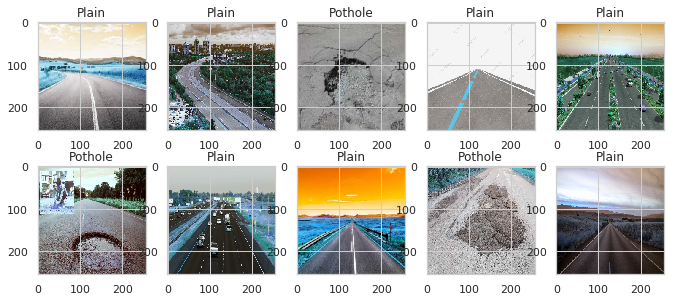

In [12]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

## Splitting the data into Training and Validation data

In [13]:
le = LabelEncoder()
Y  = le.fit_transform(Z)
Y  = to_categorical(Y,2)
print(Y)

X = np.array(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1337)
np.random.seed(42)
rn.seed(42)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Building the CNN model using RESNET (pretrained model)

In [14]:
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(256,256,3), pooling='max')
base_model.summary()

94658560/94653016 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
__________________________

In [15]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.20))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [16]:
epochs=70
batch_size=64
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
base_model.trainable=True # setting the VGG model to be trainable.
model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
Total params: 30,408,066
Trainable params: 30,354,946
Non-trainable params: 53,120
_____________________________________

In [17]:
History = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test))

Train on 541 samples, validate on 181 samples
Epoch 1/70
541/541 [==============================] - 42s 77ms/step - loss: 0.7824 - accuracy: 0.7006 - val_loss: 0.2252 - val_accuracy: 0.9171
Epoch 2/70
541/541 [==============================] - 8s 15ms/step - loss: 0.1978 - accuracy: 0.9279 - val_loss: 0.1645 - val_accuracy: 0.9558
Epoch 3/70
541/541 [==============================] - 8s 15ms/step - loss: 0.0894 - accuracy: 0.9686 - val_loss: 0.1462 - val_accuracy: 0.9613
Epoch 4/70
541/541 [==============================] - 8s 15ms/step - loss: 0.0450 - accuracy: 0.9834 - val_loss: 0.1459 - val_accuracy: 0.9669
Epoch 5/70
541/541 [==============================] - 8s 15ms/step - loss: 0.0490 - accuracy: 0.9778 - val_loss: 0.1493 - val_accuracy: 0.9503
Epoch 6/70
541/541 [==============================] - 8s 15ms/step - loss: 0.0328 - accuracy: 0.9871 - val_loss: 0.1571 - val_accuracy: 0.9613
Epoch 7/70
541/541 [==============================] - 8s 15ms/step - loss: 0.0213 - accuracy: 0

In [18]:
#import tensorflowjs as tfjs
#tfjs.converters.save_keras_model(model, '../working')

## Saving the trained model

In [19]:
#save file as h5 model
model_json = model.to_json()
with open('../working/trained_model.json', "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save('../working/trained_model.h5')


# Testing the trained model 
### [0,1] --> Pothole road
### [1,0] --> Plain road

### Testing the trained model on Pothole images

In [20]:
classes={0:'Plain',
         1:'Pothole'}

Street Classified: Pothole


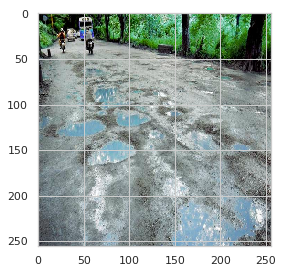

In [21]:
from keras.preprocessing import image
img_path =  '../input/pothole-and-plain-rode-images/My Dataset/test/Pothole/2.jpg'
test_image = cv2.imread(img_path)
test_image = cv2.resize(test_image, (256,256),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
predicted_class = np.argmax(probs)

#print("Predicted model",p.model)
#print("Score Accuracy: ",np.max(p[0], axis=-1))
predicted_class = classes[predicted_class]
print("Street Classified:",predicted_class)

Street Classified: Plain


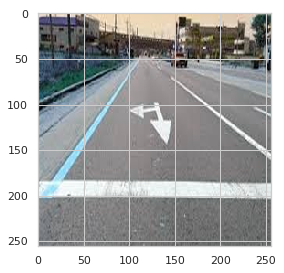

In [22]:
img_path =  '../input/pothole-and-plain-rode-images/My Dataset/test/Plain/4.jpg'
test_image = cv2.imread(img_path)
test_image = cv2.resize(test_image, (256,256),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
predicted_class = np.argmax(probs)

#print("Predicted model",p.model)
#print("Score Accuracy: ",np.max(p[0], axis=-1))
predicted_class = classes[predicted_class]
print("Street Classified:",predicted_class)

In [23]:
classes=[]
prob=[]
print("\n-------------------Street Condition Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()


-------------------Street Condition Probability--------------------------------



NameError: name 'p' is not defined

## Model Graph

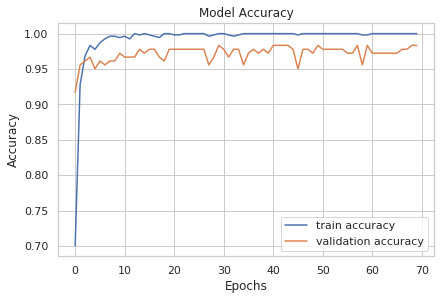

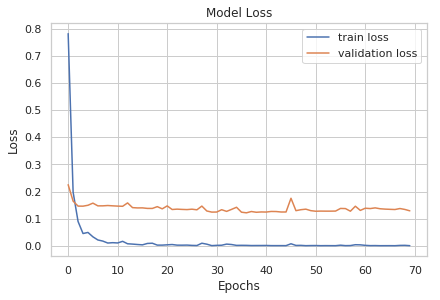

In [24]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train accuracy', 'validation accuracy'])
plt.show()
#-----------------------------------------#
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'])
plt.show()

## Converting to TFLite

In [25]:
import tensorflow as tf
import keras
file = "street.h5"
keras.models.save_model(model,file)
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file(file)
tflite_model=converter.convert()
open("street.tflite",'wb').write(tflite_model)

121236284

## Endpoint-Getting link files 

In [26]:
from IPython.display import FileLinks
FileLinks('.')

./
  street.tflite
  labels.txt
  street.h5
  trained_model.h5
  trained_model.json
  __notebook__.ipynb